In [73]:
import os
import tweepy
import ssl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from os.path import join, dirname
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')
# dotenv_path = join(dirname(__file__), '.env')
load_dotenv()

API_KEY = os.environ.get('TWITTER_API_KEY')

API_SECRET_KEY = os.environ.get('TWITTER_API_SECRET')

auth = tweepy.OAuthHandler(API_KEY,API_SECRET_KEY)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET_TOKEN)

api = tweepy.API(auth)

# api.user_timeline()

# print(dir(api))

In [92]:
tweets = []

for page in range(1, 5):
    tweets.extend(api.user_timeline(
        screen_name='@Kinaro_M', count=100))
print("number of tweets extracted will be {}".format(len(tweets)))
print(dir(tweets[0]))

number of tweets extracted will be 40
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [94]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted ==
              False and 'RT @' not in tweet.text]
for tweet in own_tweets[:5]:
    print(tweet.text,  tweet.created_at)

In [64]:
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets],
                  columns=['Date', 'Tweets', 'Length of text', 'id', 'Likes', 'Retweets'])
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets
0,2022-08-04 18:34:17+00:00,"Wangwana wa Pwani, ushindi ni wetu. Tarehe ni ...",140,1555260853322235904,1148,160
1,2022-08-04 13:47:20+00:00,On the 9th come out in numbers and together we...,91,1555188641831567360,672,80
2,2022-08-04 13:47:16+00:00,"Together with @WilliamsRuto , @DrAlfredMutua, ...",140,1555188625473769473,489,55
3,2022-08-04 13:47:13+00:00,"Our Makueni people, let's together win this el...",140,1555188609136959489,293,29
4,2022-08-04 13:47:09+00:00,Only five days remaining. Kenya Kwanza has an ...,139,1555188595622907905,1469,170


In [65]:
df[df['Likes'] == df['Likes'].max()]['Tweets']

327    The Azimio remote controlled Presidential cand...
Name: Tweets, dtype: object

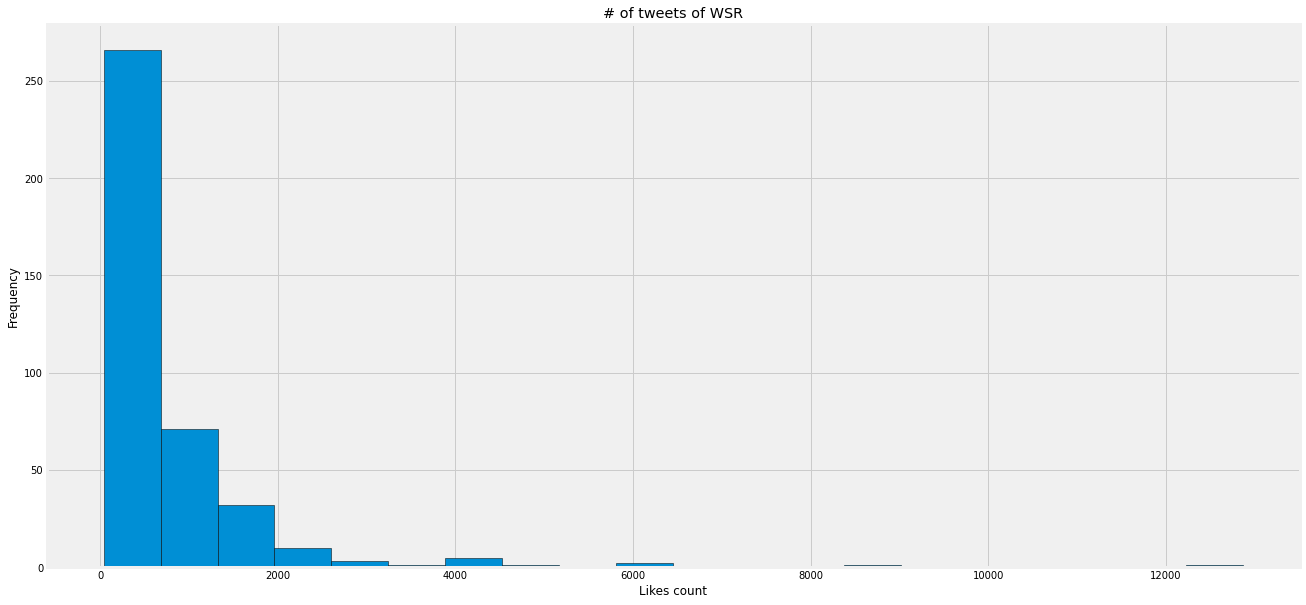

In [66]:
df['Likes'].plot(kind='hist', bins=20, figsize=(20, 10), ec='black')
plt.xlabel('Likes count')
plt.ylabel('Frequency')
plt.title('# of tweets of WSR')
plt.show()

In [67]:
import nltk
import ssl

try:
     _create_unverified_https_context =     ssl._create_unverified_context
except AttributeError:
     pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tintin72/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
vader = SentimentIntensityAnalyzer()

f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweets'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

,Date,Tweets,Length of text,id,Likes,Retweets,Sentiment
0,2022-08-04,"Wangwana wa Pwani, ushindi ni wetu. Tarehe ni ...",140,1555260853322235904,1148,160,0.0000
1,2022-08-04,On the 9th come out in numbers and together we...,91,1555188641831567360,672,80,0.0000
2,2022-08-04,"Together with @WilliamsRuto , @DrAlfredMutua, ...",140,1555188625473769473,489,55,0.0000
3,2022-08-04,"Our Makueni people, let's together win this el...",140,1555188609136959489,293,29,0.5859
4,2022-08-04,Only five days remaining. Kenya Kwanza has an ...,139,1555188595622907905,1469,170,0.0000


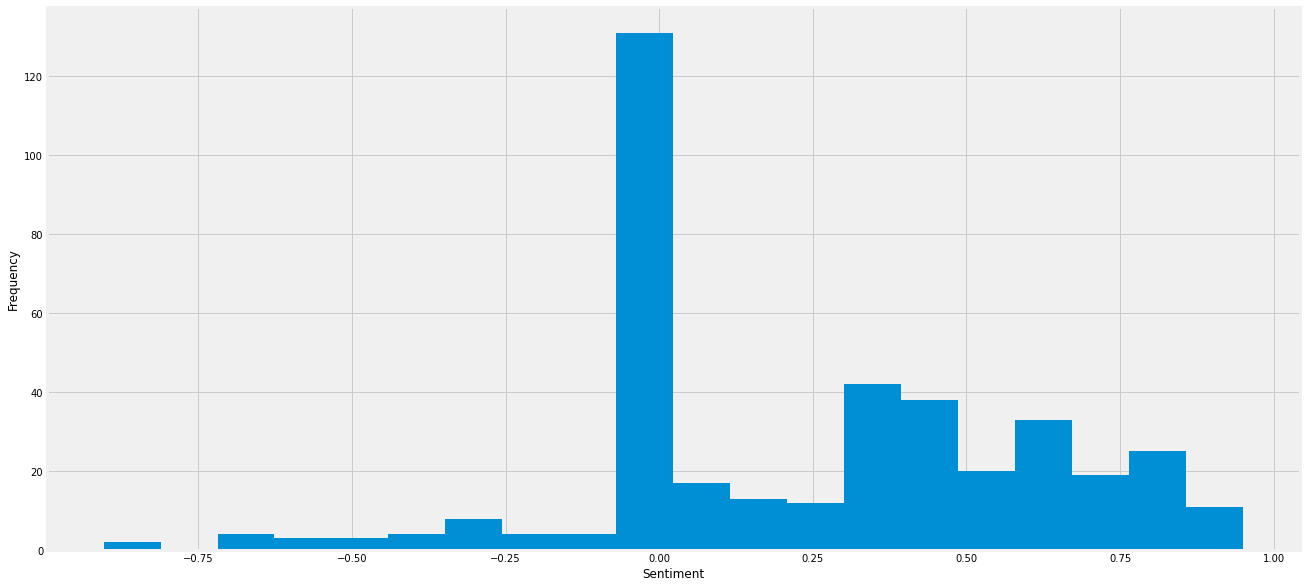

In [69]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(20,10))
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Average sentiment analysis of WSR tweets against time')

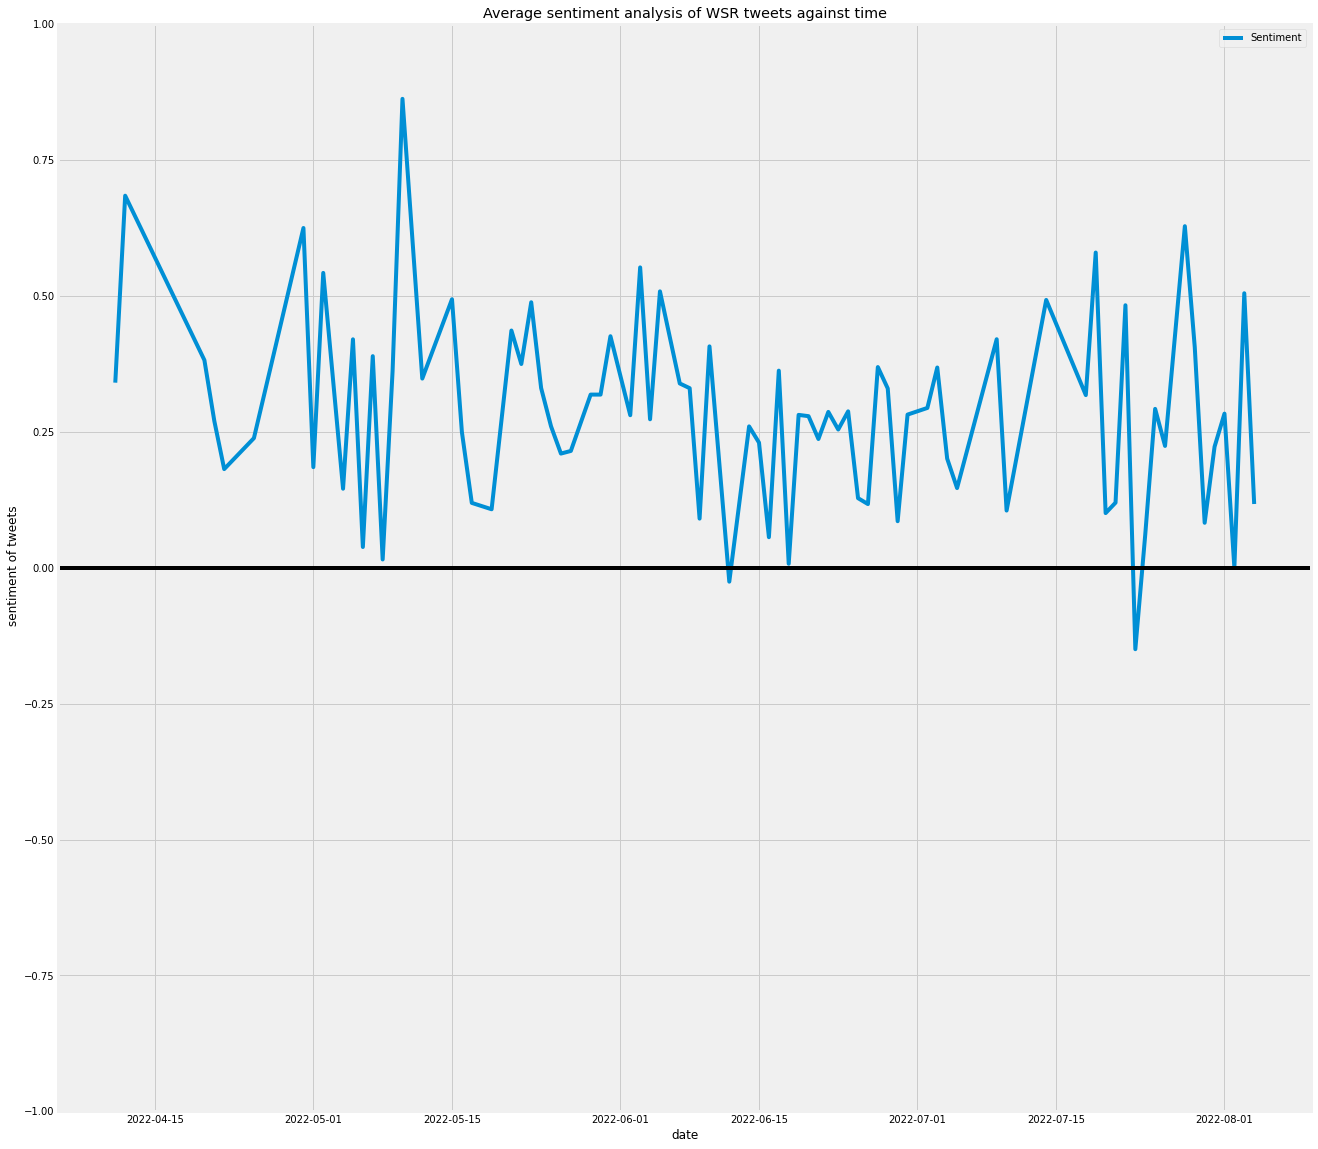

In [70]:
date_df = df.groupby(['Date']).mean().reset_index()
# date_df.head()
date_df.plot(kind='line', x="Date",y='Sentiment', figsize=(20,20), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.xlabel('date')
plt.ylabel(' sentiment of tweets')
plt.title('Average sentiment analysis of WSR tweets against time')

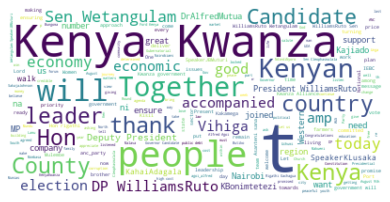

In [71]:
from wordcloud import WordCloud, STOPWORDS

text =  ' '.join(text for text in df.Tweets)

stopwords = set(STOPWORDS)

stopwords.update(['HTTPS', 'CO'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
t = df.Tweets
print(t)

0      Our Resolution - Our Azimio - Our Unification ...
1      Visit https://t.co/2txDtlVYNF to get your pers...
2      With determination and resourcefulness, we’ll ...
3      Warembo walijisajili kama Jeshi La Baba kitamb...
4      Kenyan women deserve opportunities to actualiz...
                             ...                        
367    Mr Six months, for how long will you blame eve...
368    Asanteni sana. Barikiweni. \n\n#Inawezekana ht...
369    It's been an afternoon well spent with the ami...
370    Kicked off the day at a meeting with leaders d...
371    What being a Father means to me. \n\nHappy #Fa...
Name: Tweets, Length: 372, dtype: object
